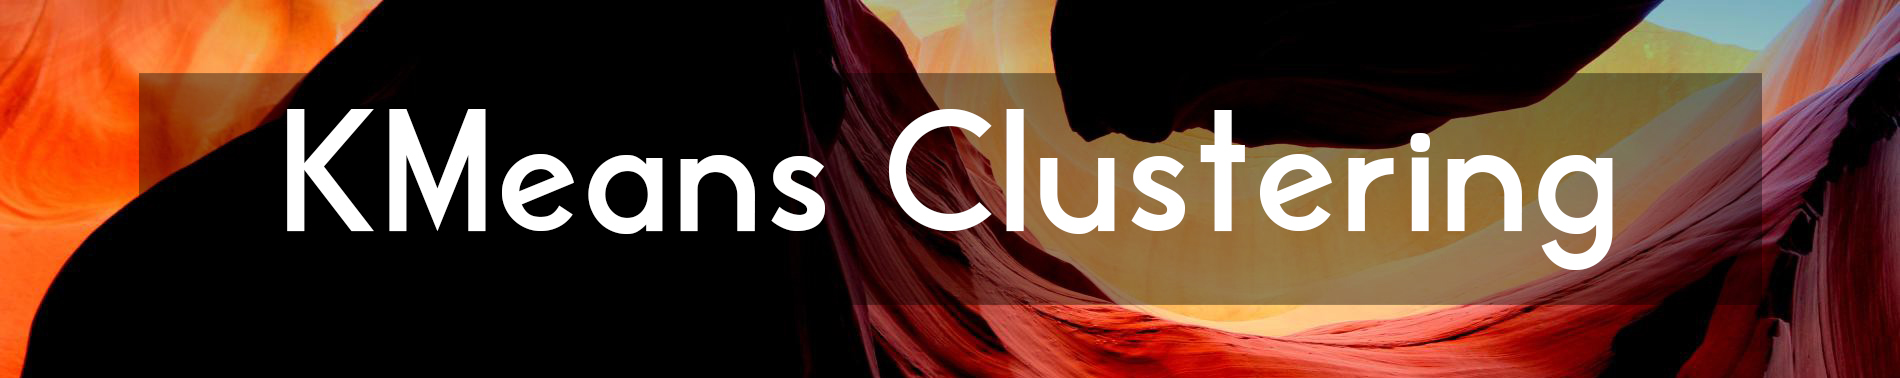

In [1]:
from IPython.display import Image
Image(filename='C:/Users/Ramki/Documents/1_pAc_1tj2v01bqutNlFthiw.jpeg')

### Clustering technique

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

##### Read the dataset

In [3]:
df=pd.read_csv('../Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Let's split the data set before passing into model

In [4]:
features=df.drop(['Id', 'Species'], axis=1)
targets=df['Species']

#### Finding the optimal cluster value using Elbow method

In [5]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

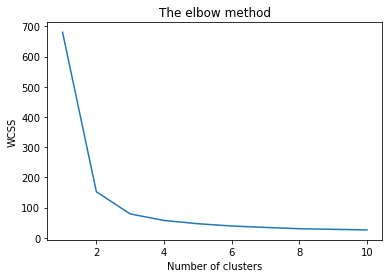

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

* From the above graph we can see that the within cluster sum of squares (WCSS) doesn't decrease significantly after the value 3
* So we can choose our number of clusters (k) value as '3'

#### Model building and generating clusters for iris dataset

In [7]:
model=KMeans(n_clusters=3)
model.fit(features)
labels=model.labels_
centroids=model.cluster_centers_

In [8]:
pd.crosstab(targets,labels)

col_0,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


In [9]:
targets=targets.astype('category')
targets=targets.cat.codes

#### Ploting the actual and predicted clusters

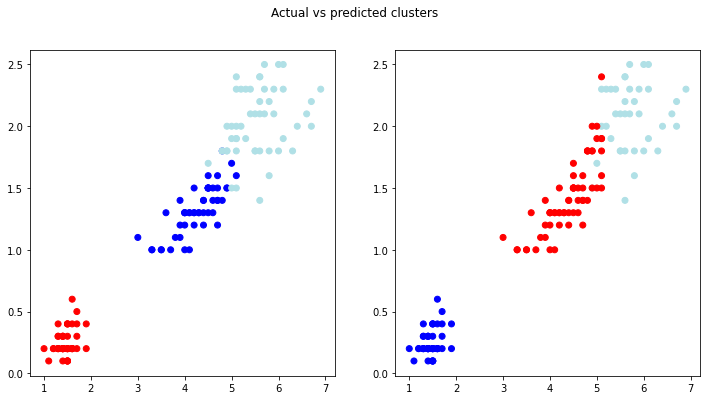

In [10]:
plt.rcParams['figure.figsize']=12,6
cmap=np.array(['Red', 'Blue', 'powderblue'])
plt.subplot(121)
plt.scatter(features.PetalLengthCm, features.PetalWidthCm, c=cmap[targets])


plt.subplot(122)
plt.scatter(features.PetalLengthCm, features.PetalWidthCm, c=cmap[labels])
plt.suptitle('Actual vs predicted clusters')
plt.show()